In [116]:
import pandas as pd

In [117]:
df = pd.read_csv("titan.csv")

In [118]:
df.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


QUESTIONS:

1. Find the mean of old scheme and new scheme column. (5 points)

ANSWER:

In [119]:
df[['Old Scheme (in thousands)','New Scheme (in thousands)']].describe()

,Old Scheme (in thousands),New Scheme (in thousands)
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


mean of old scheme is 68.03 and mean of new scheme is 72.03(in thousands)

2. Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

ANSWER:

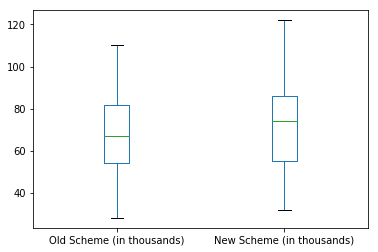

In [120]:
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt

df[['Old Scheme (in thousands)', 'New Scheme (in thousands)']].plot(kind='box')
# This saves the plot as a png file


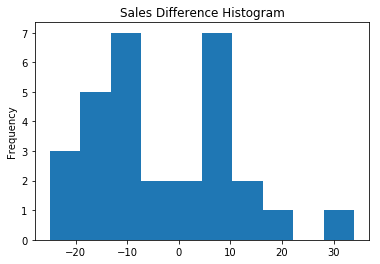

In [121]:
df['sales_difference'] = df['Old Scheme (in thousands)'] - df['New Scheme (in thousands)']

df['sales_difference'].plot(kind='hist', title= 'Sales Difference Histogram')

In [122]:
stats.shapiro(df['sales_difference'])

(0.939639151096344, 0.08894610404968262)

In [123]:
group1 = df['Old Scheme (in thousands)']
group2 = df['New Scheme (in thousands)']

In [124]:
# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
t_statistic, p_value = stats.ttest_rel(group1, group2)
print(t_statistic, p_value)

-1.5559143823544377 0.13057553961337662


p > 0.05, Hence null hypothesis stays.

3. What conclusion does the test (p-value) lead to? (2.5 points)

as p > 0.05, hence null hypothesis stays.

4. Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
The probability of a type 1 error? (2.5 points)

Answer:
Probability of Type 1 error = significance level = 0.05 or 5%

5. What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)

Answer:
Let  μ2 = Average sums assured by salesperson AFTER changeover.

μ1 = Average sums assured by salesperson BEFORE changeover.

μd = μ2 – μ1   H0: μd ≤ 5000  HA: μd > 5000

This is a right tail test.

t_statistic, p_value = stats.ttest_rel(group1, group2)
print(t_statistic, p_value)

In [125]:
t_statistic, p_value = stats.ttest_1samp(group1-group2, 5)
print(t_statistic, p_value)

-3.500807360297485 0.0015212146316676064


6 Power of the test (5 points)

In [126]:
from scipy.stats import norm
# define probability
p = 0.95
# retrieve value <= probability
value = norm.ppf(p)
print(value)
# confirm with cdf
p = norm.cdf(value)
print(p)

1.6448536269514722
0.95


In [127]:
# calculate means
import statistics
mean1, mean2 = statistics.mean(group1), statistics.mean(group2)

In [128]:
# number of paired samples
n = len(group1)

In [129]:
# sum squared difference between observations
d1 = sum([(group1[i]-group2[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([group1[i]-group2[i] for i in range(n)])

In [130]:
# standard deviation of the difference between means
sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))

In [131]:
# standard error of the difference between the means
sed = sd / np.sqrt(n)

In [132]:
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
t_stat

-1.5559143823544377

In [133]:
# degrees of freedom
df = n - 1

In [134]:
from scipy.stats import t
# calculate the critical value
cv = t.ppf(1.0 - 0.5, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
print(cv,p)

6.695449894631025e-17 0.13057553961337676


In [135]:
import statsmodels.stats.power as smp


In [136]:
diff=group2-group1

In [137]:
diff.describe()

count    30.000000
mean      4.000000
std      14.081046
min     -34.000000
25%      -6.750000
50%       7.500000
75%      16.000000
max      25.000000
dtype: float64

In [138]:
SE=14.081046/np.sqrt(n)

In [139]:
std = np.std(group1-group2)

In [140]:
effect_size = (mean1-mean2)/std

In [141]:
effect_size

-0.2889260474058461

In [142]:
abs(effect_size)

0.2889260474058461

In [146]:
smp.ttest_power(effect_size, nobs=30, alpha=0.05, alternative='larger')

0.0007078818167221002